# Credit Amount EDA Case Study

### Introduction

We have loan applications data for about 307k applications. The goal of this case is to perform Risk Analytics with the help of data wrangling and visualisation libraries of Python. The end goal is to derive important insights for the bank to identify the characteristics for bad loan applications. ( Bad loans are loans which are delayed/not paid.)

### Objectives

* Identify what are some common characteristics of bad loan applications
* Identify if there are any patterns related to applicants with loan difficulties
* Identify the driving factors or strong indicators of a bad loan application

### Data Dictionary 

A common starting point in any EDA problem is - Understanding the data. 

The first step is to check if there is a data dictionary availalble, and try to get a good understanding of the 
level of the data and meaning of each of the columns.

The data dictionary document has been provided along with the data. It is advised to go through each of the column in 
data once before starting with EDA.

A screenshot of the same is given below - 

The dictionary can also be imported to Jupyter notebook as below - 

# EDA - Credit Applications 

##### Let's begin our EDA now. The flow of the entire case would be as follows - 

1. Data Wrangling
 * Data load 
 * Data shape
 * Data types
 * 5 point summary (describe)
 * Data Preprocessing 
      * Missing Values 
      * Outlier CHeck 
      * Correlation check 
      * Feature Engineering 
      * Normaliztion, Encoding (only required at ML model stage)
2. Univariate Analysis
3. Bivariate/Multivariate Analysis
4. Final Insights

## Importing libraries

In [1]:
# For suppressing warning messages
import warnings

warnings.filterwarnings('ignore')

In [2]:
#importing core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline   


In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
## Changing default figure size using rcParams

print("Earlier, figure default size was: ", plt.rcParams["figure.figsize"])
plt.rcParams["figure.figsize"] = (10, 5)
print("Now, figure default size is: ", plt.rcParams["figure.figsize"])

Earlier, figure default size was:  [6.0, 4.0]
Now, figure default size is:  [10.0, 5.0]


In [5]:
# Setting theme for charts

plt.style.use('ggplot')

## 1. Data Wrangling 

Loading the data - 

In [6]:
credit_data = pd.read_csv("application_data.csv")
credit_data.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.500,29686.500,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.000,21865.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.500,27517.500,...,0,0,0,0,0.000,0.000,0.000,0.000,1.000,1.000
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.000,41301.000,...,0,0,0,0,0.000,0.000,0.000,1.000,1.000,2.000
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.000,42075.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.000,33826.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.000,20250.000,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


* We see that the data is at Loan ID level ( SK_ID_CURR).
* There is a mix of quantitative and qualitative variables.
* There are a lot of Flags as well. 
* There are considerable NAs as well at the first glance of data.

### 1.1 Inspecting data

In [7]:
# Checking shape of the data

credit_data.shape

(307511, 122)

Now we know that there are 307511 loan applications and 122 fields for each application. 

##### 5 Point summary

describe function is used to get the 5 number statistical summary of the quantitative variables of a data.
The focus points could be the Range, mean and median for each variable to get a better understanding of the variables.

( Do a quick search about 5 Point summary in case not aware )

In [8]:
# Checking 5 point summary with describe function

credit_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000,307511.000,307511.000,307511.000,307511.000,307499.000,307233.000,307511.000,307511.000,307511.000,...,307511.000,307511.000,307511.000,307511.000,265992.000,265992.000,265992.000,265992.000,265992.000,265992.000
mean,278180.519,0.081,0.417,168797.919,599026.000,27108.574,538396.207,0.021,-16036.995,63815.046,...,0.008,0.001,0.001,0.000,0.006,0.007,0.034,0.267,0.265,1.900
std,102790.175,0.272,0.722,237123.146,402490.777,14493.737,369446.461,0.014,4363.989,141275.767,...,0.090,0.024,0.023,0.018,0.084,0.111,0.205,0.916,0.794,1.869
min,100002.000,0.000,0.000,25650.000,45000.000,1615.500,40500.000,0.000,-25229.000,-17912.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,189145.500,0.000,0.000,112500.000,270000.000,16524.000,238500.000,0.010,-19682.000,-2760.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,278202.000,0.000,0.000,147150.000,513531.000,24903.000,450000.000,0.019,-15750.000,-1213.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,367142.500,0.000,1.000,202500.000,808650.000,34596.000,679500.000,0.029,-12413.000,-289.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000
max,456255.000,1.000,19.000,117000000.000,4050000.000,258025.500,4050000.000,0.073,-7489.000,365243.000,...,1.000,1.000,1.000,1.000,4.000,9.000,8.000,27.000,261.000,25.000


* Mean Vs Median Comparison
* STD 
* Min And max, if any absurd values. 

##### Invalid -ve values

Another important use case of describe function is to check for Invalid -ve values.
Here for example, a close look will tell us that all the columns starting with "DAYS_..." (example - DAYS_BIRTH ) have -ve values which cannot be valid.
We will clean the data by tranforming this data appropriately later. 


##### Getting the list of % Nulls in each column

In [9]:
# Null % for all columns in data

null_perc = credit_data.isnull().sum()/len(credit_data)*100

In [10]:
pd.set_option('display.max_rows', 500)

In [11]:
# Top 60 cols with maximum null % 

null_perc.sort_values(ascending = False)

COMMONAREA_MEDI                69.872
COMMONAREA_AVG                 69.872
COMMONAREA_MODE                69.872
NONLIVINGAPARTMENTS_MODE       69.433
NONLIVINGAPARTMENTS_AVG        69.433
NONLIVINGAPARTMENTS_MEDI       69.433
FONDKAPREMONT_MODE             68.386
LIVINGAPARTMENTS_MODE          68.355
LIVINGAPARTMENTS_AVG           68.355
LIVINGAPARTMENTS_MEDI          68.355
FLOORSMIN_AVG                  67.849
FLOORSMIN_MODE                 67.849
FLOORSMIN_MEDI                 67.849
YEARS_BUILD_MEDI               66.498
YEARS_BUILD_MODE               66.498
YEARS_BUILD_AVG                66.498
OWN_CAR_AGE                    65.991
LANDAREA_MEDI                  59.377
LANDAREA_MODE                  59.377
LANDAREA_AVG                   59.377
BASEMENTAREA_MEDI              58.516
BASEMENTAREA_AVG               58.516
BASEMENTAREA_MODE              58.516
EXT_SOURCE_1                   56.381
NONLIVINGAREA_MODE             55.179
NONLIVINGAREA_AVG              55.179
NONLIVINGARE

Columns with a lot of NULLs are not useful for us as they would only capture data about a select applications. 

There is no standard rule for a good/bad % NULLs for columns to be used or discarded. It should be purely dependent on 
use case and application of the EDA.

In our case, in order to keep this exercise simpler, we will discard all columns having more than 45% NULLs.

### 1.2 Data Cleaning 

Identifying and removing columns with more than 45% nulls

In [12]:
# Filtered list of Columns & NULL counts where NULL values are more than 45%
null_col = credit_data.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.45*len(credit_data))]
null_col

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [13]:
no=len(null_col)
print("There are "+ str(no) + " columns with more than 45% NULLs")


There are 49 columns with more than 45% NULLs


Let's visually look at the columns with NULLs>45% and there NULL counts - 

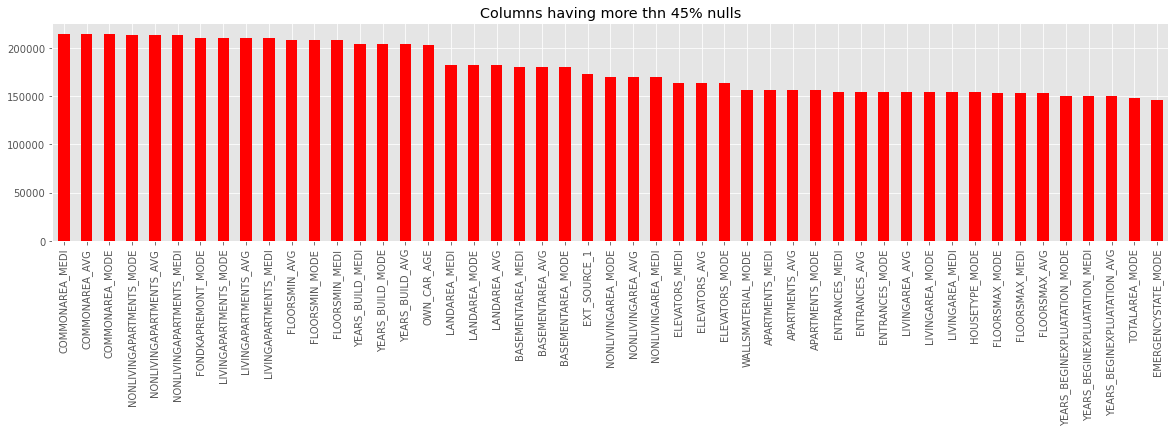

In [14]:
plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="red")
plt.title('Columns having more thn 45% nulls')
plt.show()

##### Removal of columns with NULLs>45%

In [15]:
a = (credit_data.isnull().sum()/len(credit_data))
list(a[a.values>=0.45].index)

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [16]:
# Function to remove the columns having percentage of null values > 45%
def remove_null_cols(data):
    perc=0.45    
    mand_cols = ['A','B','C']
    # Deciding cut-off NULL % to be 45%
    df = data.copy()                                                      # Creating a copy of data
    shape_before = df.shape                                               # Storing the shape of data before removal of columns
    remove_cols = (df.isnull().sum()/len(df))                             # Calculating % of NULLs
    remove_cols = list(remove_cols[remove_cols.values>=perc].index)
#     for i in remove_cols:
#         if i in mandcols:
#             remove_cols.remove(i)
    # Filtering cols with NULLs>45%
    df.drop(labels = remove_cols,axis =1,inplace=True)                    # Dropping cols
    print("Number of Columns dropped\t: ",len(remove_cols))    
    print("\nOld dataset rows,columns",shape_before,"\nNew dataset rows,columns",df.shape)
    return df

In [17]:
# Removing cols with more than 45% nulls. Now we'll be using credit_data_1 for further analysis

credit_data_1 = remove_null_cols(credit_data)

Number of Columns dropped	:  49

Old dataset rows,columns (307511, 122) 
New dataset rows,columns (307511, 73)


In [18]:
# Checking the % of null values for each column in new dataset
null_perc_1 = credit_data_1.isnull().sum()/len(credit_data_1)*100
null_perc_1.sort_values(ascending = False).head(60)

OCCUPATION_TYPE              31.346
EXT_SOURCE_3                 19.825
AMT_REQ_CREDIT_BUREAU_YEAR   13.502
AMT_REQ_CREDIT_BUREAU_QRT    13.502
AMT_REQ_CREDIT_BUREAU_MON    13.502
AMT_REQ_CREDIT_BUREAU_WEEK   13.502
AMT_REQ_CREDIT_BUREAU_DAY    13.502
AMT_REQ_CREDIT_BUREAU_HOUR   13.502
NAME_TYPE_SUITE               0.420
OBS_30_CNT_SOCIAL_CIRCLE      0.332
DEF_30_CNT_SOCIAL_CIRCLE      0.332
OBS_60_CNT_SOCIAL_CIRCLE      0.332
DEF_60_CNT_SOCIAL_CIRCLE      0.332
EXT_SOURCE_2                  0.215
AMT_GOODS_PRICE               0.090
AMT_ANNUITY                   0.004
CNT_FAM_MEMBERS               0.001
DAYS_LAST_PHONE_CHANGE        0.000
FLAG_DOCUMENT_17              0.000
FLAG_DOCUMENT_18              0.000
FLAG_DOCUMENT_21              0.000
FLAG_DOCUMENT_20              0.000
FLAG_DOCUMENT_19              0.000
FLAG_DOCUMENT_2               0.000
FLAG_DOCUMENT_3               0.000
FLAG_DOCUMENT_4               0.000
FLAG_DOCUMENT_5               0.000
FLAG_DOCUMENT_16            

In [20]:
credit_data_1['AMT_REQ_CREDIT_BUREAU_YEAR'].head(20)

0    1.000
1    0.000
2    0.000
3      NaN
4    0.000
5    1.000
6    2.000
7    0.000
8    1.000
9      NaN
10   0.000
11   2.000
12   0.000
13   1.000
14     NaN
15   1.000
16   0.000
17     NaN
18   0.000
19   2.000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [22]:
0.13*307000

39910.0

In [21]:
credit_data_1['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count   265992.000
mean         1.900
std          1.869
min          0.000
25%          0.000
50%          1.000
75%          3.000
max         25.000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

We have now verified that our modified dataframe "Credit_data_1" has no cols with more than 31% NULLs

### 1.3 Imputing Missing Data

The below listed columns can be categorized into a group of columns with similar significance as they all represent number of queries made to the Credit Bureau. 

Upon further investigation, we'll see that all have mode as 0. 
We can impute NULLs for all of these with value 0. 

In the end it is also varified that there are 0 NULLs after imputation.

##### AMT_REQ_CREDIT_BUREAU_YEAR
##### AMT_REQ_CREDIT_BUREAU_MON
##### AMT_REQ_CREDIT_BUREAU_WEEK
##### AMT_REQ_CREDIT_BUREAU_DAY
##### AMT_REQ_CREDIT_BUREAU_HOUR
##### AMT_REQ_CREDIT_BUREAU_QRT

In [23]:
# Checking value counts for AMT_REQ_CREDIT_BUREAU_YEAR
credit_data_1.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

# We see that there are 71k 0s

0.000     71801
1.000     63405
2.000     50192
3.000     33628
4.000     20714
5.000     12052
6.000      6967
7.000      3869
8.000      2127
9.000      1096
11.000       31
12.000       30
10.000       22
13.000       19
14.000       10
17.000        7
15.000        6
19.000        4
18.000        4
16.000        3
25.000        1
23.000        1
22.000        1
21.000        1
20.000        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [24]:
# Similarly we can check for all. 
# Instead we can use the mode function to check modes for all of these variables

print(credit_data_1.AMT_REQ_CREDIT_BUREAU_YEAR.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_MON.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_WEEK.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_DAY.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_HOUR.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_QRT.mode())

0   0.000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64
0   0.000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
0   0.000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64
0   0.000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
0   0.000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
0   0.000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


In [25]:
credit_data_2 = credit_data_1.copy() # Making copy of our last data

##### Imputing NULLs with 0s

In [26]:
# Imputing null with 0s

impute_list = ['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK',
               'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']

for i in impute_list:
        credit_data_2[i] = credit_data_1[i].fillna(0)
                         


In [27]:
null_perc_2 = credit_data_2.isnull().sum()/len(credit_data_2)*100
null_perc_2.sort_values(ascending = False).head(60)

OCCUPATION_TYPE              31.346
EXT_SOURCE_3                 19.825
NAME_TYPE_SUITE               0.420
OBS_30_CNT_SOCIAL_CIRCLE      0.332
DEF_30_CNT_SOCIAL_CIRCLE      0.332
OBS_60_CNT_SOCIAL_CIRCLE      0.332
DEF_60_CNT_SOCIAL_CIRCLE      0.332
EXT_SOURCE_2                  0.215
AMT_GOODS_PRICE               0.090
AMT_ANNUITY                   0.004
CNT_FAM_MEMBERS               0.001
DAYS_LAST_PHONE_CHANGE        0.000
FLAG_DOCUMENT_10              0.000
FLAG_DOCUMENT_2               0.000
FLAG_DOCUMENT_3               0.000
FLAG_DOCUMENT_4               0.000
FLAG_DOCUMENT_5               0.000
FLAG_DOCUMENT_6               0.000
FLAG_DOCUMENT_7               0.000
FLAG_DOCUMENT_8               0.000
FLAG_DOCUMENT_9               0.000
SK_ID_CURR                    0.000
FLAG_DOCUMENT_11              0.000
FLAG_DOCUMENT_20              0.000
AMT_REQ_CREDIT_BUREAU_QRT     0.000
AMT_REQ_CREDIT_BUREAU_MON     0.000
AMT_REQ_CREDIT_BUREAU_WEEK    0.000
AMT_REQ_CREDIT_BUREAU_DAY   

##### Verifying count of NULLs after imputaion

In [28]:
# Verifying count of NULLs after imputaion

print(credit_data_2['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())
print(credit_data_2['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())
print(credit_data_2['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())
print(credit_data_2['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())
print(credit_data_2['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum())
print(credit_data_2['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum())

0
0
0
0
0
0


#### AMT_ANNUITY

Since AMT_ANNUITY is a continuous variable, unlike AMT_REQ_CREDIT_BUREAU_YEAR etc ( which could take only integer values),
it is better to impute this with the median value.

Another reason for chosing to go for Median instead of Mode is close value counts for top 2 values as we'll see below.

In [29]:
credit_data_1['AMT_ANNUITY'].describe()

count   307499.000
mean     27108.574
std      14493.737
min       1615.500
25%      16524.000
50%      24903.000
75%      34596.000
max     258025.500
Name: AMT_ANNUITY, dtype: float64

In [30]:
# Checking value counts for AMT_ANNUITY

credit_data_1.AMT_ANNUITY.value_counts()

9000.000      6385
13500.000     5514
6750.000      2279
10125.000     2035
37800.000     1602
              ... 
79902.000        1
106969.500       1
60885.000        1
59661.000        1
77809.500        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

We see that top 2 value counts are close to each other. Thus we can chose to go for Median imputation.

In [31]:
# median for AMT_ANNUITY

credit_data_1.AMT_ANNUITY.median()

24903.0

##### Imputing NULLs with Median

In [32]:
# Imputing NULLs with Median

credit_data_2['AMT_ANNUITY'] = credit_data_1['AMT_ANNUITY'].fillna(credit_data_1.AMT_ANNUITY.median())
credit_data_2['AMT_ANNUITY'].isnull().sum()

0

#### AMT_GOODS_PRICE

Similar to AMT_ANNUITY, imputing NULLs with Median for  AMT_GOODS_PRICE for similar reasons.

In [33]:
# Checking value counts for AMT_GOODS_PRICE

credit_data_1.AMT_GOODS_PRICE.value_counts() 

450000.000     26022
225000.000     25282
675000.000     24962
900000.000     15416
270000.000     11428
               ...  
1265751.000        1
503266.500         1
810778.500         1
666090.000         1
743863.500         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [34]:
# median for AMT_GOODS_PRICE

credit_data_1.AMT_GOODS_PRICE.median()

450000.0

In [35]:
# Imputing NULLs with Median

credit_data_2['AMT_GOODS_PRICE'] = credit_data_1['AMT_GOODS_PRICE'].fillna(credit_data_1.AMT_GOODS_PRICE.median())

In [36]:
# Verifying count of NULLs to be 0

credit_data_2['AMT_GOODS_PRICE'].isnull().sum()

0

In [40]:
(credit_data_2.isnull().sum()/len(credit_data_2)*100).sort_values(ascending = False)

OCCUPATION_TYPE               31.346
EXT_SOURCE_3                  19.825
NAME_TYPE_SUITE                0.420
OBS_30_CNT_SOCIAL_CIRCLE       0.332
DEF_30_CNT_SOCIAL_CIRCLE       0.332
OBS_60_CNT_SOCIAL_CIRCLE       0.332
DEF_60_CNT_SOCIAL_CIRCLE       0.332
EXT_SOURCE_2                   0.215
CNT_FAM_MEMBERS                0.001
DAYS_LAST_PHONE_CHANGE         0.000
SK_ID_CURR                     0.000
FLAG_DOCUMENT_5                0.000
FLAG_DOCUMENT_7                0.000
FLAG_DOCUMENT_6                0.000
FLAG_DOCUMENT_2                0.000
FLAG_DOCUMENT_4                0.000
FLAG_DOCUMENT_3                0.000
FLAG_DOCUMENT_9                0.000
FLAG_DOCUMENT_8                0.000
FLAG_DOCUMENT_10               0.000
LIVE_CITY_NOT_WORK_CITY        0.000
FLAG_DOCUMENT_11               0.000
AMT_REQ_CREDIT_BUREAU_QRT      0.000
AMT_REQ_CREDIT_BUREAU_MON      0.000
AMT_REQ_CREDIT_BUREAU_WEEK     0.000
AMT_REQ_CREDIT_BUREAU_DAY      0.000
AMT_REQ_CREDIT_BUREAU_HOUR     0.000
F

### 1.4 Fixing erroneous data

As seen already with the help of describe function, we know that we need to treat -ve values in days columns.

We can modify the values to be absolute values, assuming that -ve sign was a technical fault during data feed. 

In [41]:
# Confirming that all DAYS fields have -ve values

print(credit_data['DAYS_BIRTH'].unique())
print(credit_data['DAYS_EMPLOYED'].unique())
print(credit_data['DAYS_REGISTRATION'].unique())
print(credit_data['DAYS_ID_PUBLISH'].unique())
print(credit_data['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [42]:
# Preparing the list of columns to be treated

erroneous_cols = [cols for cols in credit_data_2.columns if cols.startswith('DAYS')]
erroneous_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [43]:
# Changing the column values with Absolute values using abs function

credit_data_2[erroneous_cols]= abs(credit_data_2[erroneous_cols])

In [44]:
# Verifying absence of -ve values in data

credit_data_2.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,...,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000
mean,278180.519,0.081,0.417,168797.919,599026.000,27108.488,538316.294,0.021,16036.995,67724.742,...,0.008,0.001,0.001,0.000,0.006,0.006,0.030,0.231,0.230,1.643
std,102790.175,0.272,0.722,237123.146,402490.777,14493.461,369288.982,0.014,4363.989,139443.752,...,0.090,0.024,0.023,0.018,0.078,0.103,0.191,0.857,0.744,1.856
min,100002.000,0.000,0.000,25650.000,45000.000,1615.500,40500.000,0.000,7489.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,189145.500,0.000,0.000,112500.000,270000.000,16524.000,238500.000,0.010,12413.000,933.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,278202.000,0.000,0.000,147150.000,513531.000,24903.000,450000.000,0.019,15750.000,2219.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,367142.500,0.000,1.000,202500.000,808650.000,34596.000,679500.000,0.029,19682.000,5707.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000
max,456255.000,1.000,19.000,117000000.000,4050000.000,258025.500,4050000.000,0.073,25229.000,365243.000,...,1.000,1.000,1.000,1.000,4.000,9.000,8.000,27.000,261.000,25.000


In [46]:
7489/365

20.517808219178082

We have confirmed that there are no -ve values anymore.

#### Replacing XNAs for CODE_GENDER

A quick look on the value counts for CODE_GENDER shows 4 counts of XNA which is equivalent of a NULL.

Since 4 is a relatively small count, it doesn't matter much on how we impute it. Imputing it with Mode F in our case.

In [47]:
# CHecnking value counts for CODE_GENDER

credit_data_2.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [48]:
# Replacing XNAs with F

credit_data_2.loc[credit_data_2.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
credit_data_2.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### Replacing XNAs for ORGANIZATION_TYPE

XNAs for ORGANIZATION_TYPE have 2nd highest count in the data. 
We must be very careful in imputing such a high number of XNAs with any value.

Since it is a categorical variable, and there won't be any aggregrate functions performed on this data,
we don't necessarily need whole of the value to be imputed.

Thus, changing all XNAs with NULLs to protect the originality of data.

In [49]:
# Checking value counts for ORGANIZATION_TYPE

credit_data_2.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [50]:
# Replacing XNAs with Nulls

credit_data_2['ORGANIZATION_TYPE'] = credit_data_1['ORGANIZATION_TYPE'].replace('XNA',np.NaN)

In [51]:
# Checking value counts for credit_data_2

credit_data_2.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

We have confirmed that there are no more XNAs now in this field. 

In [52]:
(credit_data_2.isnull().sum()/len(credit_data_2)*100).sort_values(ascending = False)

OCCUPATION_TYPE               31.346
EXT_SOURCE_3                  19.825
ORGANIZATION_TYPE             18.007
NAME_TYPE_SUITE                0.420
OBS_30_CNT_SOCIAL_CIRCLE       0.332
DEF_30_CNT_SOCIAL_CIRCLE       0.332
OBS_60_CNT_SOCIAL_CIRCLE       0.332
DEF_60_CNT_SOCIAL_CIRCLE       0.332
EXT_SOURCE_2                   0.215
CNT_FAM_MEMBERS                0.001
DAYS_LAST_PHONE_CHANGE         0.000
FLAG_DOCUMENT_5                0.000
FLAG_DOCUMENT_7                0.000
FLAG_DOCUMENT_6                0.000
FLAG_DOCUMENT_2                0.000
FLAG_DOCUMENT_4                0.000
FLAG_DOCUMENT_3                0.000
FLAG_DOCUMENT_9                0.000
FLAG_DOCUMENT_8                0.000
SK_ID_CURR                     0.000
LIVE_CITY_NOT_WORK_CITY        0.000
FLAG_DOCUMENT_11               0.000
AMT_REQ_CREDIT_BUREAU_QRT      0.000
AMT_REQ_CREDIT_BUREAU_MON      0.000
AMT_REQ_CREDIT_BUREAU_WEEK     0.000
AMT_REQ_CREDIT_BUREAU_DAY      0.000
AMT_REQ_CREDIT_BUREAU_HOUR     0.000
F

### 1.5 Adding new columns by Binning Continuous Variables

It is always a good practice to identify core or highly significant continuous fields in the data and then bin them into specific categories. It allows for an additional categorical analysis for such fields. We'll observe the use case of same later in this EDA exercise.
For now, let's bin some of the continuous variables into 5 bins each as below -


##### Binning AMT_INCOME_TOTAL

In [54]:
# Note : New function pd.qcut

# Using pd.qcut function to bin AMT_INCOME_TOTAL into 5 categories

credit_data_2['AMT_INCOME_RANGE'] = pd.qcut(credit_data_2.AMT_INCOME_TOTAL, 
                                            q=[0, 0.2, 0.5, 0.8, 0.95, 1], 
                                            labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
credit_data_2['AMT_INCOME_RANGE'].head(7)

0      MEDIUM
1        HIGH
2    VERY_LOW
3         LOW
4         LOW
5    VERY_LOW
6      MEDIUM
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

##### Binning AMT_CREDIT

In [55]:
# Using pd.qcut function to bin AMT_CREDIT_RANGE into 5 categories

credit_data_2['AMT_CREDIT_RANGE'] = pd.qcut(credit_data_2.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
credit_data_2['AMT_CREDIT_RANGE'].head(7)

0          LOW
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5          LOW
6    VERY_HIGH
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

##### Binning DAYS_BIRTH

In [56]:
# Binning DAYS_BIRTH into 5 categories

# Step 1 : Convert days into Years ( Age)
# Step 2 : Bin as per Age of Applicant


credit_data_2['DAYS_BIRTH']= (credit_data_2['DAYS_BIRTH']/365).astype(int)
credit_data_2['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [57]:
# Using pd.qcut function to bin DAYS_BIRTH into 5 categories

credit_data_2['DAYS_BIRTH_BINS']=pd.cut(credit_data_2['DAYS_BIRTH'], 
                                      bins=[19,25,35,60,100], 
                                      labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

In [58]:
# Checking value counts for DAYS_BIRTH_BINS

credit_data_2['DAYS_BIRTH_BINS'].value_counts()

Middle_Age        185900
Young              75925
Senior_Citizen     29368
Very_Young         16318
Name: DAYS_BIRTH_BINS, dtype: int64

### 1.6 Splitting data based on TARGET

Splitting data into 2 subsets based on Target Variable- Defaulter Data and Non-Defaulter Data.

This will help us with the comparison among 2 groups later 

In [59]:
# SPlitting data as per TARGET into deafulter and non-defaulter datasets

defaulter = credit_data_2[credit_data_2.TARGET==1]
non_defaulter =  credit_data_2[credit_data_2.TARGET==0]

In [60]:
# Checking row counts of data split as per TARGET

print(" Defaulter data shape - " + str(defaulter.shape) )
print(" Non-Defaulter data shape - " + str(non_defaulter.shape) )

 Defaulter data shape - (24825, 76)
 Non-Defaulter data shape - (282686, 76)


In [61]:
# Checking % of data split as per TARGET

print(" Defaulter data % - " + str(round(defaulter.shape[0]*100/credit_data_2.shape[0],2) ))
print(" Non-Defaulter data % - " + str(round(non_defaulter.shape[0]*100/credit_data_2.shape[0],2) ))

 Defaulter data % - 8.07
 Non-Defaulter data % - 91.93


## 2. Univariate Analysis

Univariate Analysis is simplest form of analysing data. It restricts the analysis to only 1 variable as the name states.
( Uni means One )

It doesn't take into account the mutual relationships and associations among variables. Rather it focuses on 
finding patterns through a particular field. 

In [62]:
len(credit_data_2.columns)

76

##### Occupation Type

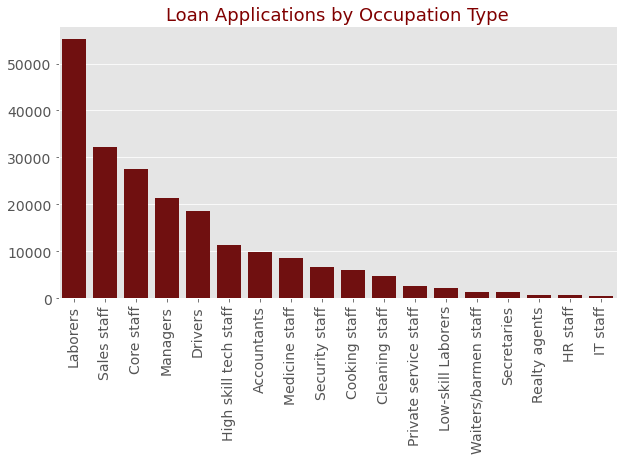

In [64]:
# Distribution of 'OCCUPATION_TYPE'

temp = credit_data_2["OCCUPATION_TYPE"].value_counts()                      # Value counts for Occupation type
sns.barplot(x=temp.index, y = temp.values, color = 'maroon')                # Plotting bar graph
_=plt.xticks(rotation=90, size = 14)                                        # Rotating x axis ticks so that values dont overlap
_=plt.yticks( size = 14)                                                    # Adjusting size for y txis ticks
_=plt.title('Loan Applications by Occupation Type', size=18,color = 'maroon') # Chart title

We can infer that most of the applications come for Labourers, Sales Staff and Core Staff. 

##### Organization Type

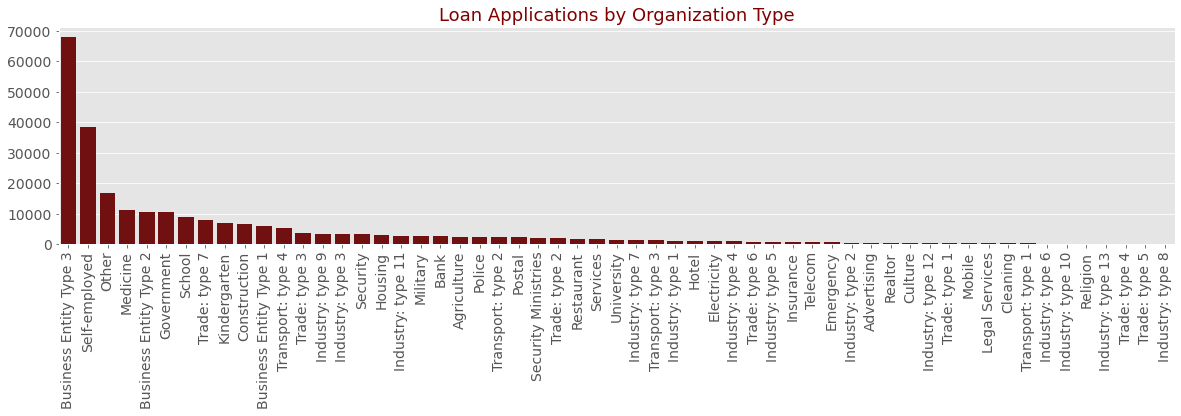

In [65]:
# Distribution of 'Organization Type'
plt.figure(figsize=(20,4))
temp = credit_data_2["ORGANIZATION_TYPE"].value_counts()
sns.barplot(x=temp.index, y = temp.values, color = 'maroon')
_=plt.xticks(rotation=90, size = 14)
_=plt.yticks( size = 14)
_=plt.title('Loan Applications by Organization Type', size=18,color = 'maroon')

It is observed that majority of the applicants belong to Business Entity Type 3 an Self Employed. 

##### Comparison of Gender Distribution among Defaulters and Non Defaulters

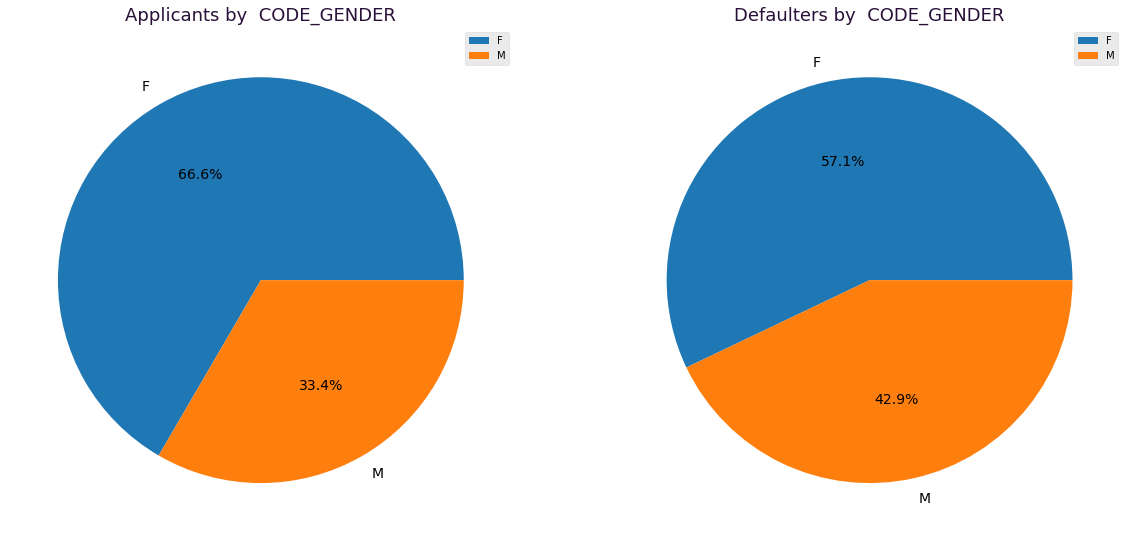

In [66]:
## Code to See the Comparison of Gender Applicants Distribution among Defaulters and Non-Defaulters 

colors = sns.color_palette('tab10')[0:5]                   # Setting Color pallette for pie chart

fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,12))   # Defining Subplots and figure size. Keeping it wider for 2 chart
axes[0].set_title("Box Plot of  " )                        # Setting title for Subplot 1
data = non_defaulter['CODE_GENDER'].value_counts()         # Data prep fot Subplot 1 ( Non Defaulter )
data_df = pd.DataFrame({'labels': data.index,'values': data.values})     

# Pie chart for Subplot 1 ( Non Defaulter part )
_=axes[0].pie(data_df['values'], labels = data_df['labels'], colors = colors, autopct='%0.1f%%',textprops={'fontsize': 14})
_=axes[0].set_title('Applicants by  '+'CODE_GENDER', size=18,color = '#291038')
_=axes[0].legend()

# Pie chart for Subplot 2 ( Defaulter part )
axes[1].set_title("Box Plot of  " )
data = defaulter['CODE_GENDER'].value_counts()
data_df = pd.DataFrame({'labels': data.index,'values': data.values})
_=axes[1].pie(data_df['values'], labels = data_df['labels'], colors = colors, autopct='%0.1f%%',textprops={'fontsize': 14})
_=axes[1].set_title('Defaulters by  '+'CODE_GENDER', size=18,color = '#291038')
_=axes[1].legend()

Insights - 

* There is majority of Male loan apllicants
* More Men deafult loans as compared to Women, since the % split has increased further for Men in case of Defaulter distribution.

Often we would require to re-use the same code for multiple combination of variables.

It is a common practice to prepare charts by calling functions instead of re-writing the code again and again.

There are following benefits to this appraoch - 
* Code Modularity is improved
* Less code is required to perform same amount of task
* Notebook looks more cleaner

##### Converting above code to a function - 

In [70]:
# Function for Univariate Comarison

def univariate_comparison(col,hue=None):
    colors = sns.color_palette('tab10')[0:5]

    fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,12))
    axes[0].set_title("Box Plot of  " )
    data = non_defaulter[col].value_counts()
    data_df = pd.DataFrame({'labels': data.index,'values': data.values})
    _=axes[0].pie(data_df['values'], labels = data_df['labels'], colors = colors, autopct='%0.1f%%',textprops={'fontsize': 14})
    _=axes[0].set_title('Applicants by  '+col, size=18,color = '#291038')
    _=axes[0].legend()

    axes[1].set_title("Box Plot of  " )
    data = defaulter[col].value_counts()
    data_df = pd.DataFrame({'labels': data.index,'values': data.values})
    _=axes[1].pie(data_df['values'], labels = data_df['labels'], colors = colors, autopct='%0.1f%%',textprops={'fontsize': 14})
    _=axes[1].set_title('Defaulters by  '+col, size=18,color = '#291038')
    _=axes[1].legend()

##### Comparison of Income Type Distribution among Defaulters and Non Defaulters

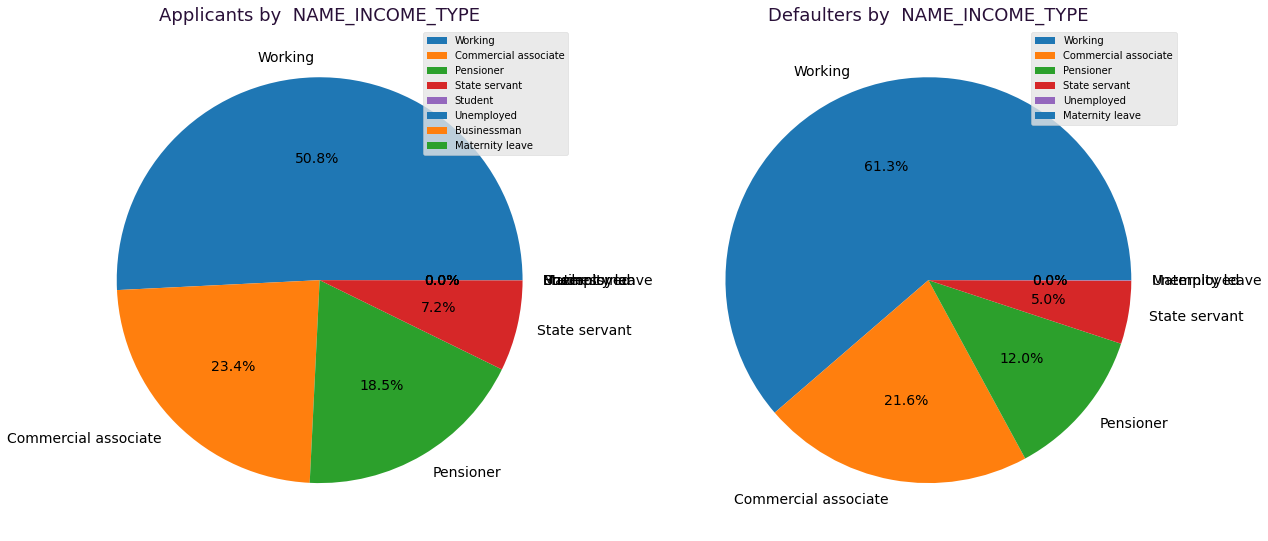

In [71]:
# Comparison of Income Type Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_INCOME_TYPE')

Insights - 
* Almost half of the Loan applications come from Working professionals.
* Working professionals contribute more than expected to loan defaults. The % split has increased from 51% to 61%

##### Comparison of Family Status Distribution among Defaulters and Non Defaulters

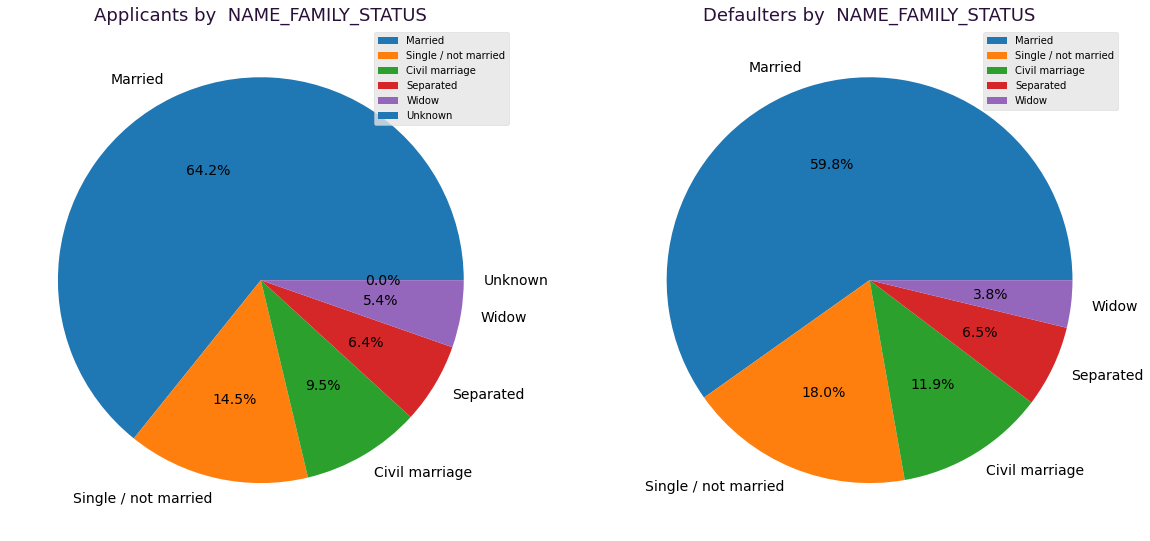

In [72]:
# Comparison of Family Status Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_FAMILY_STATUS')

Insights-
* 65 % of the Loan applicants are married.
* Family status doesn't seem to have any major impact on Loan deafults.

##### Comparison of Education Type Distribution among Defaulters and Non Defaulters

In [ ]:
# Comparison of Education Type Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_EDUCATION_TYPE')

Insights-
* More than 2/3rds of Loan applicants have highest education as Secondary. 
* Secondary Education class contribute majorly ( more than expected too) for loan defaults.
* There is a considerable decrease in % split for loan defaults by people with higher education. ( from 25% to 16%)

##### Comparison of Housing Type Distribution among Defaulters and Non Defaulters

In [ ]:
# Comparison of Housig Type Distribution among Defaulters and Non Defaulters


univariate_comparison('NAME_HOUSING_TYPE')

Insights-
* Almost 90% of Loan applicants have their own home.
* Housing type doesn't play a significant role in determining whether there will be a loan defaulter. 

##### Comparison of Income Range Distribution among Defaulters and Non Defaulters

In [ ]:
# Comparison of Income Range Distribution among Defaulters and Non Defaulters

univariate_comparison('AMT_INCOME_RANGE')

Insights-
* Here also, the % split is more or less unchanged for Defaulters. It suggests that Income doesn't play a significant role in loan defaults. Although, further drilldown analysis ( later done in this notebook ) would tell us a different story.

It is always good practice to verify our hypotheses by multiple checks and not jump onto conclusions quickly. 

NOTE : Let's recall that AMT_INCOME_RANGE is a derived variable created by binning earlier. 
This how binning can be useful in EDA, while this is just one use case, it has many other applications in ML as well. 

##### Comparison of Age Distribution among Defaulters and Non Defaulters

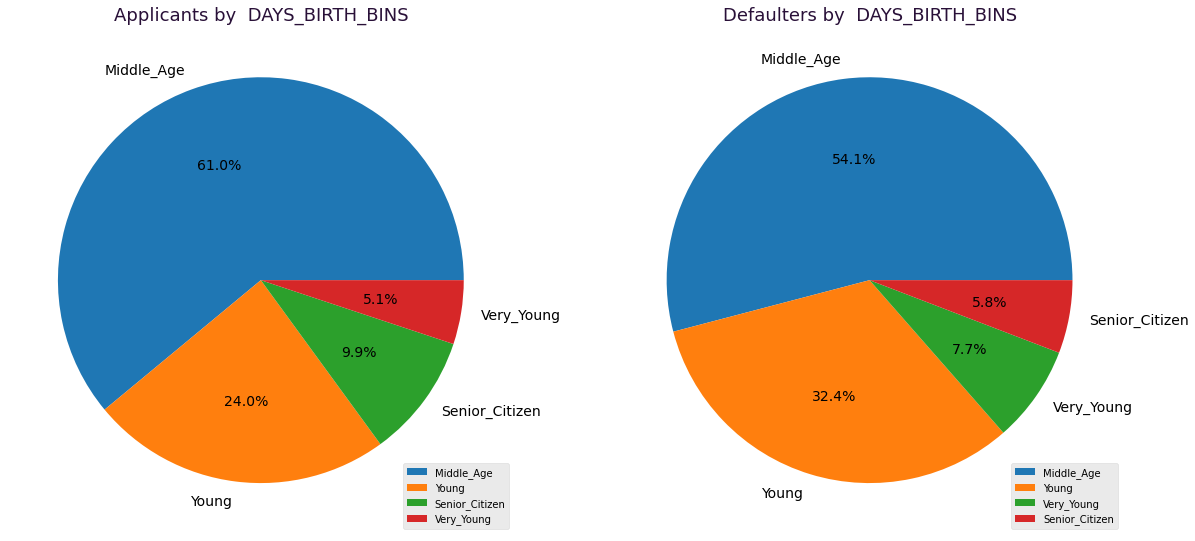

In [73]:
# Comparison of Age Distribution among Defaulters and Non Defaulters

univariate_comparison('DAYS_BIRTH_BINS')

Insights - 
* There is a significant shift in % split for Middle Age and Young applicants.
* Middle Aged applicants are contributing lesser to loan defaults
* Young applicants are more expected to default on a loan since there is a change in % aplit from 24% to 32%

##### Comparison of Loan Type Distribution among Defaulters and Non Defaulters

In [ ]:
# Comparison of Loan Type Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_CONTRACT_TYPE')

Insights-
* Cash loans are slightly more likely to be defaulted than revolving loans. 

##### Comparison of Accompany Type Distribution among Defaulters and Non Defaulters

In [ ]:
# Comparison of Accompany Type Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_TYPE_SUITE')

 Insights-
* Majority of loans are applied by single occupants
* This parameter doesn't have any impact on loan defaults as the % split is unchanged in both cases.

### Univariate Analysis of Quantitative Variables

In [74]:
# Defining function for Univariate Analysis of Quantitative Variables

def univariate_comparison_quant(col,hue=None):

    fig, axes=plt.subplots(nrows =2,ncols=2,figsize=(20,12))                      # Defining 4 subplots, changing fig size
    axes[0,0].set_title("Displot (Non-Defaulter) for  " + col )                   # Chart titl for Subplot 1
    sns.distplot(non_defaulter[~non_defaulter[col].isna()][col],ax=axes[0,0], color="#4CB391") # Distplot in subplot 1


    axes[0,1].set_title("Displot (Defaulter) for  " + col )                       #  Title for Subplot 2
    sns.distplot(defaulter[~defaulter[col].isna()][col],ax=axes[0,1], color="#4CB391") # Displot in Subplot 2
    
    axes[1,0].set_title("Boxplot (Non-Defaulter) for  " + col )                   # Title for Subplot 3
    sns.boxplot(non_defaulter[~non_defaulter[col].isna()][col],ax=axes[1,0], color="#4CB391") # Boxplot in subplot 3

    axes[1,1].set_title("Boxplot (Defaulter) for  " + col )                       # Title for Subplot 4
    sns.boxplot(defaulter[~defaulter[col].isna()][col],ax=axes[1,1], orient='h',color="#4CB391") # Boxplot in Subplot 4

    plt.tight_layout()

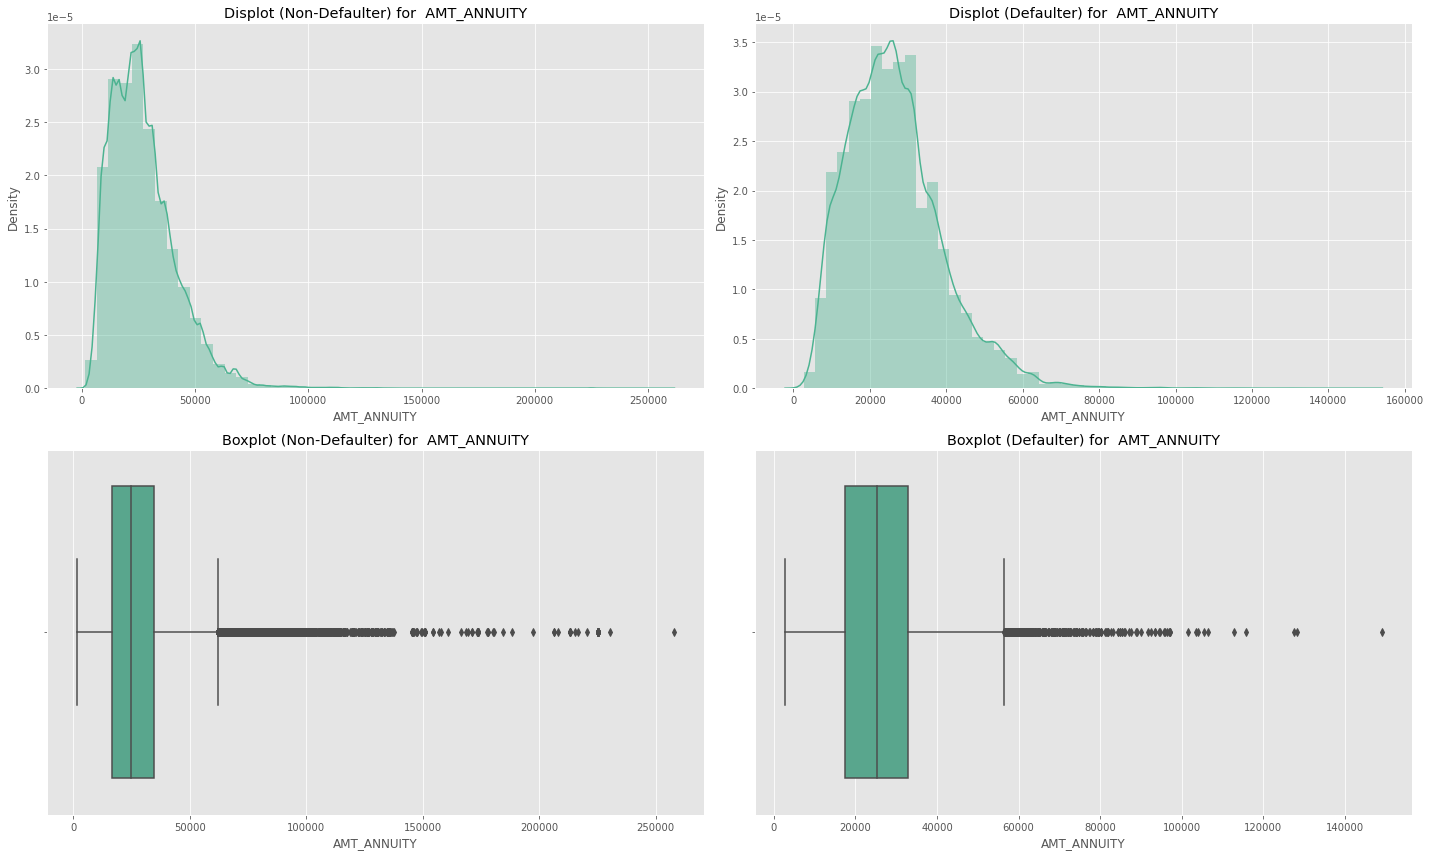

In [75]:
# Univariate Analysis for Annuity Amount

univariate_comparison_quant('AMT_ANNUITY')

Insights - 
* Applicants with lower Annuity Amount are slightly more likely to default on a loan.
* Majority of Loan applicants come from 1st quartile of Annuity data ( Low salary people )

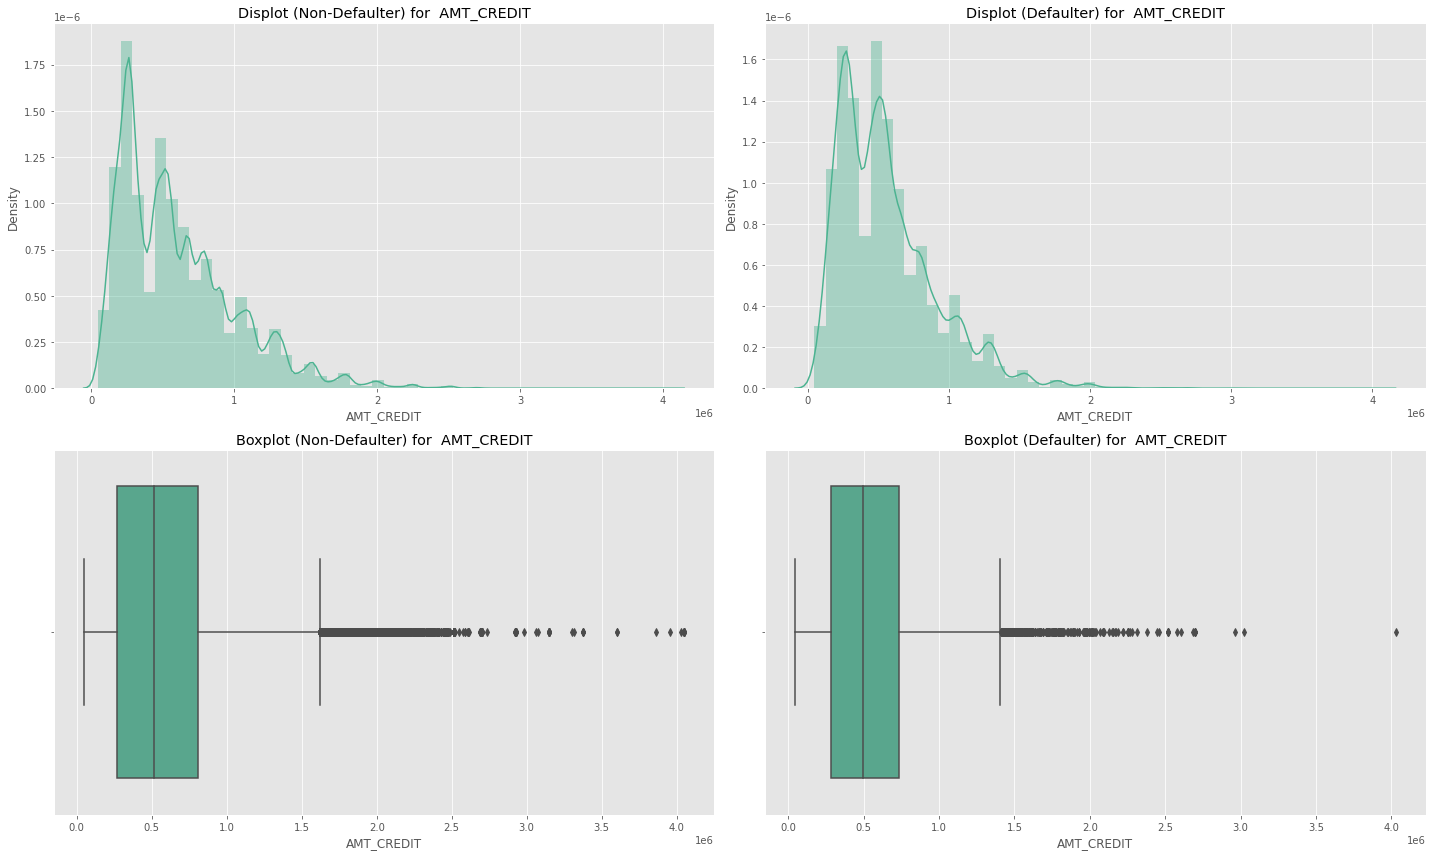

In [76]:
# Univariate Analysis for Loan Amount

univariate_comparison_quant('AMT_CREDIT')

Insights-
* Loan Amount doesn't seem to have any correlation with Loan defaults. 

In [ ]:
# Univariate Analysis for Goods Price Amount

univariate_comparison_quant(col='AMT_GOODS_PRICE')

Insights-
* The distribution are almost unchanged for Defaulters and Non Defaulters, hence we can say that Goods Price doesn't impact the chance of a loan default.

## 3. Bivariate & Multivariate Analysis

Bivariate Analysis - 

It is one of the simplest form of statistical analysis where 2 variables are involved. It looks for relationship among the 2 variables.
The applications involve hypothesis validation of association among variables, finding trends, regression etc.

Multivariate Analysis-

When more than 2 variable are involved in an analysis, it will be a multi-variate analysis. The additional variables may take form of hue color, 3rd axis etc. 

In [78]:
# Function for Multivariate analysis

def multivariate(col1,col2,col3):                                            # Takes 3 columns as inputs

    fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,12))               
    
    axes[0].set_title("Boxplot (Non-Defaulter) for  "  )
    _=sns.boxplot(data=non_defaulter,x=col1, y=col2,palette = 'rainbow', hue= col3,ax=axes[0])
    _=axes[0].set_title('Loan Amount by  ' + col2 + ' & ' + col3 + ' (Non-Defaulter)', size=15,color = 'blue')

    axes[1].set_title("Boxplot (Defaulter) for  "  )
    _=sns.boxplot(data=defaulter,x=col1, y=col2,palette = 'rainbow', hue= col3,ax=axes[1])
    _=axes[1].set_title('Loan Amount by  ' + col2 + ' & ' + col3 + ' (Defaulter)', size=15,color = 'blue')


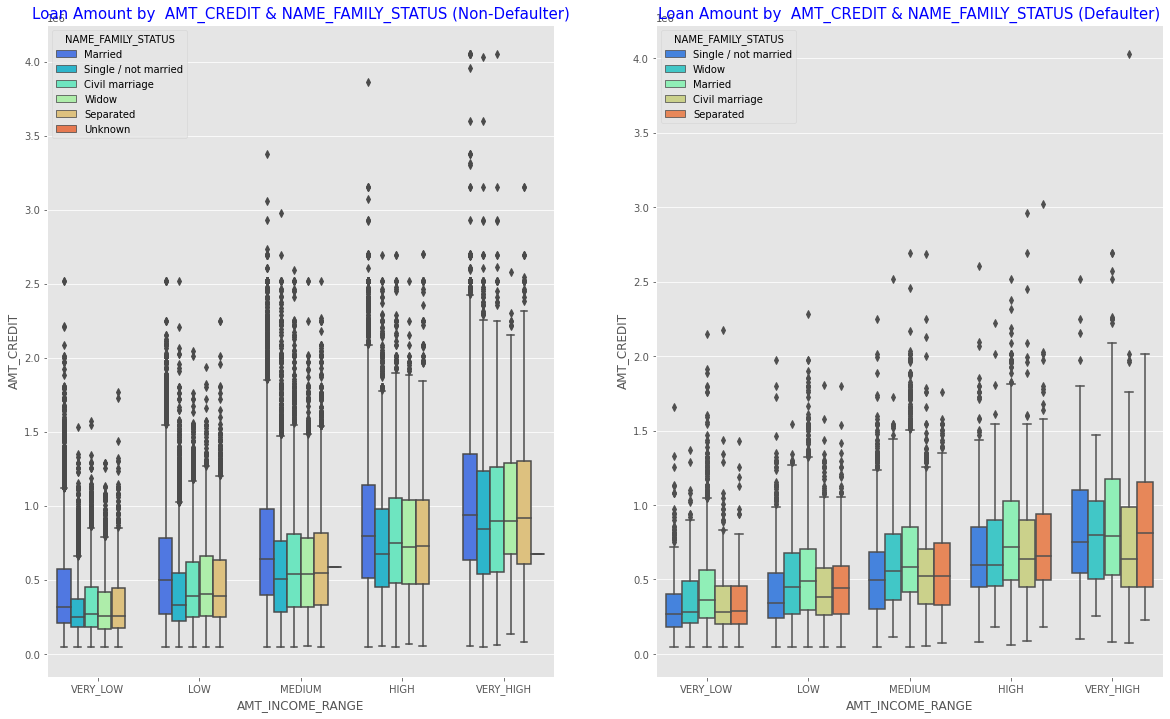

In [79]:
# Analysis of AMT_INCOME_RANGE, AMT_CREDIT & NAME_FAMILY_STATUS

multivariate('AMT_INCOME_RANGE','AMT_CREDIT','NAME_FAMILY_STATUS')

Insights-
* With increase in Income range, the loan amount increases proportionally.
* On family status axis, we observe that Married applicants have higher loan amount than others.


In [ ]:
# Analysis of NAME_EDUCATION_TYPE, AMT_CREDIT & NAME_FAMILY_STATUS

multivariate('NAME_EDUCATION_TYPE','AMT_CREDIT','NAME_FAMILY_STATUS')

Insights-
* Higher the education, lesser is the likelihood of a loan default
* Among different family status, married ones have the highest likelihood of loan default

#### Drilldown Analysis

Here we'll look for % defaulters within different classes in a particular variable. 

In [80]:
# Defining function for drilldown analysis

def perc_defaulters(col):

    fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,10))
    
    total = credit_data_2[[col,'TARGET']].groupby(col).count()
    defaulter_1 = defaulter[[col,'TARGET']].groupby(col).count()
    perc = defaulter_1*100/total
    
    axes[0].set_title("Application Counts by  "+ col  )
    _=sns.barplot(x=total.index,y=total.TARGET,color='grey',order=total.sort_values('TARGET',ascending=False).index,ax=axes[0])
    _=axes[0].set_xticklabels(total.sort_values('TARGET',ascending=False).index,rotation=60, ha='right')

    axes[1].set_title("Defaulter % by " + col  )
    _=sns.barplot(x=perc.index,y=perc.TARGET,color='#ff597d',order=perc.sort_values('TARGET',ascending=False).index,ax=axes[1])
    _=axes[1].set_xticklabels(perc.sort_values('TARGET',ascending=False).index,rotation=60, ha='right')


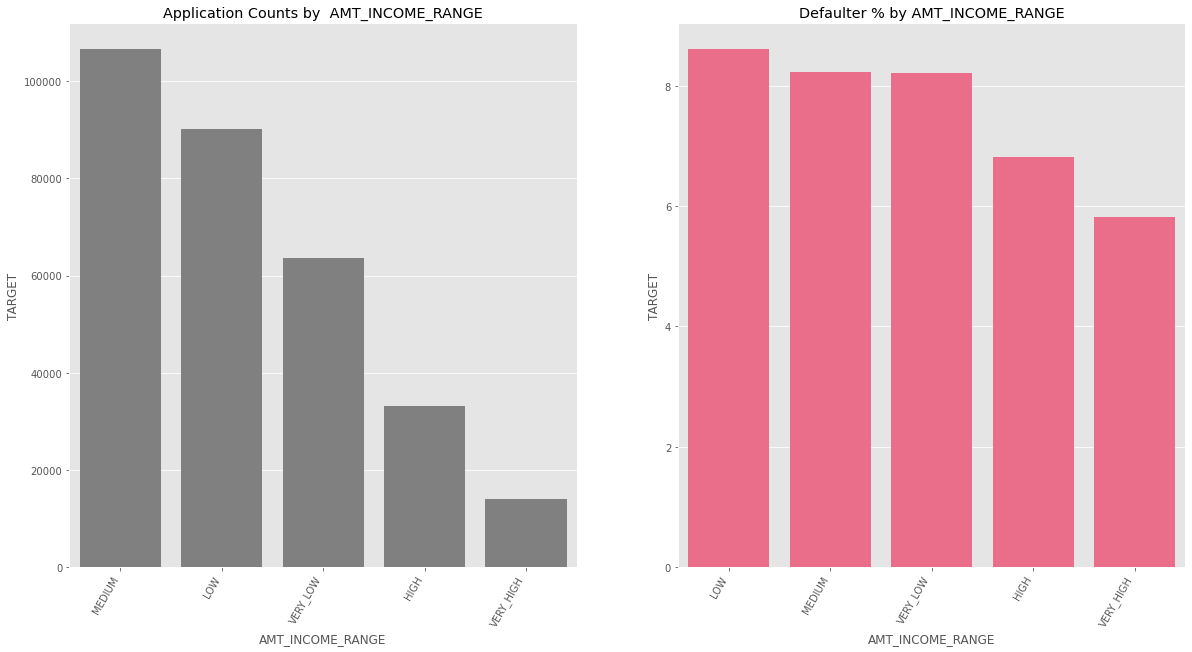

In [81]:
# Drilldown analysis of AMT_INCOME_RANGE

perc_defaulters('AMT_INCOME_RANGE')

Insights-
* Median income range professionals have maximum applications in the data
* Low Income range have maximum % of loan defaults
* As the Income range increases, loan default probability decreases

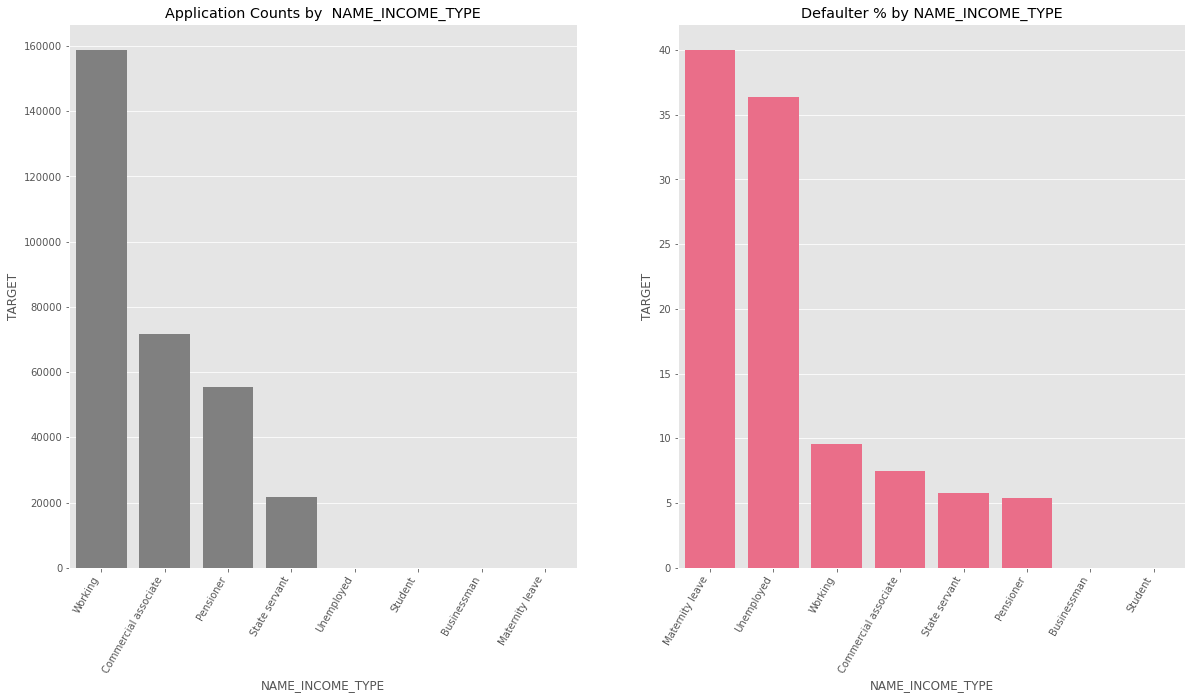

In [82]:
# Drilldown analysis of NAME_INCOME_TYPE

perc_defaulters('NAME_INCOME_TYPE')

Insights-
* Applicants on Maternity leave have a whopping 40% loan default rate
* The second to the list are Unemployed applicants with 35% loan defaults

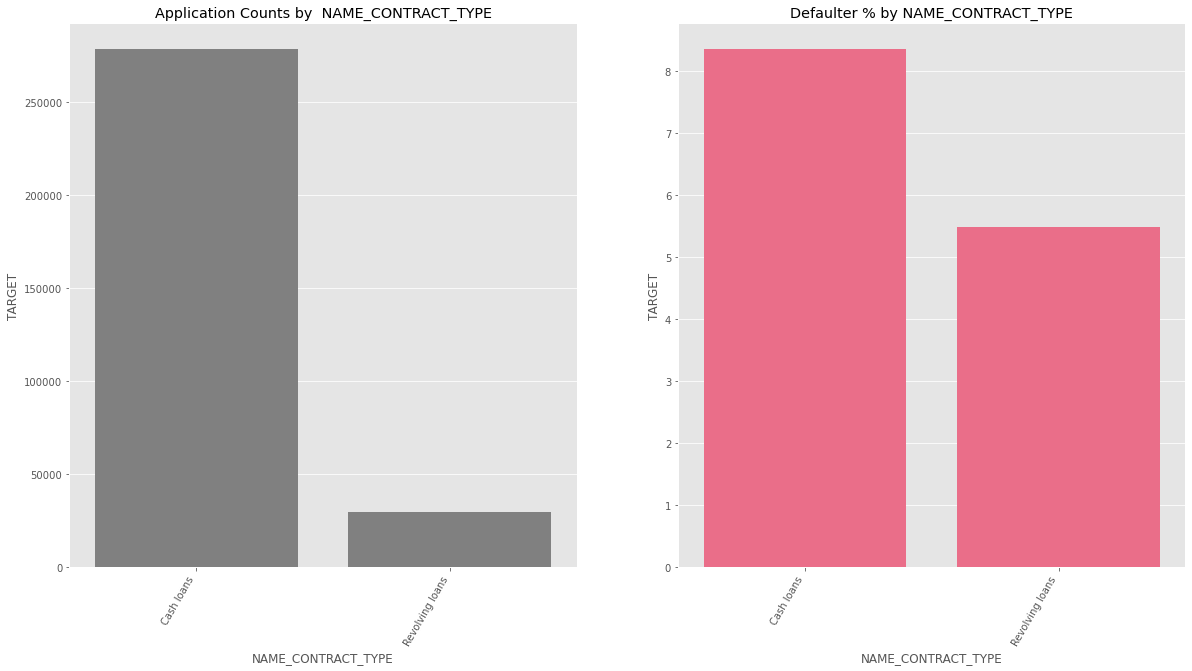

In [83]:
# Drilldown analysis of NAME_CONTRACT_TYPE
perc_defaulters('NAME_CONTRACT_TYPE')

Insights-
* Majority of the loans are cash loans. Cash loans also have almost double probability of a loan default than revolving loans.

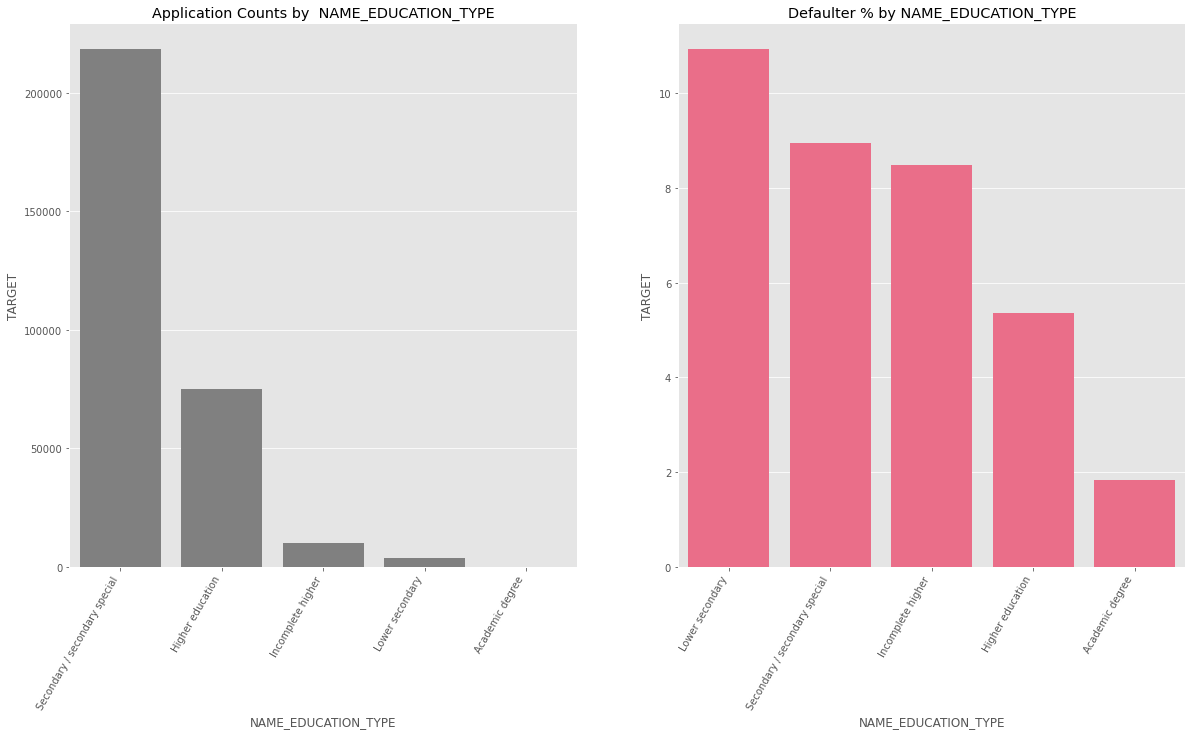

In [84]:
# Drilldown analysis of NAME_EDUCATION_TYPE
perc_defaulters('NAME_EDUCATION_TYPE')

Insights-
* Higher the education of an applicant, lesser the chance of loan default
* Lower secondary applicants have a concerning 11% loan default rate, but the count of applicants is low 
* The major concern is of Secondary education applicants. They have highest applicants and a significant 9% loan default rate as well. 

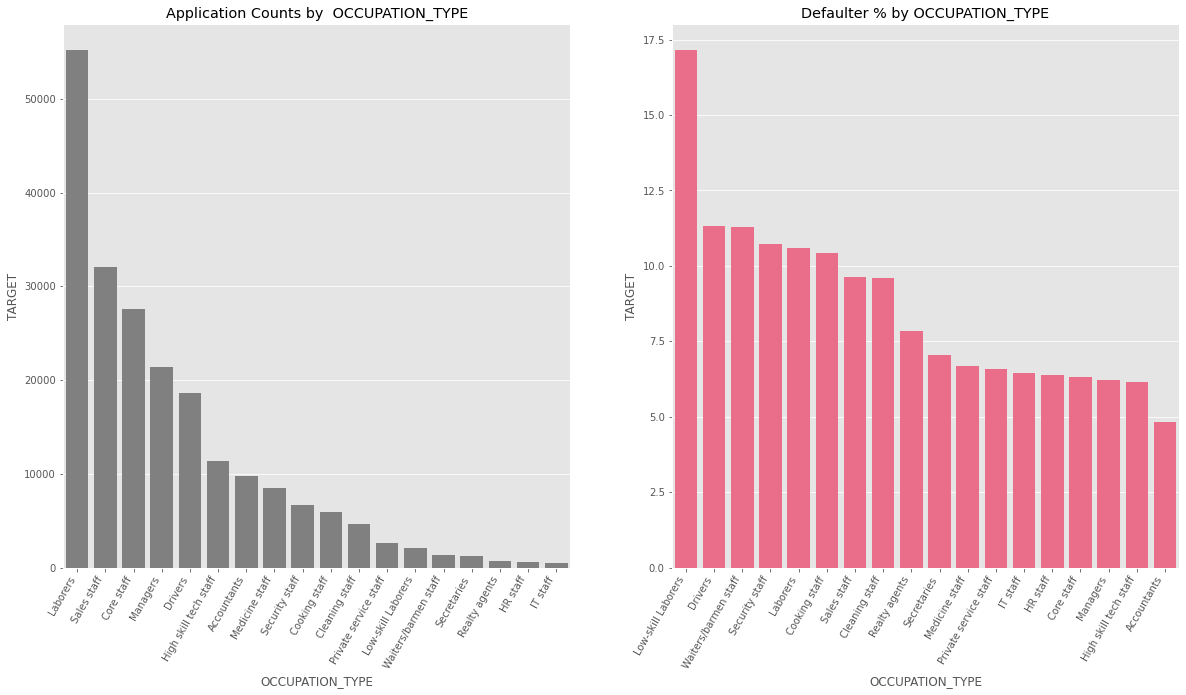

In [85]:
# Drilldown analysis of OCCUPATION_TYPE

perc_defaulters('OCCUPATION_TYPE')

Insights-
* Low skill labourers  have an alarming 17% loan default rate. The positive here is that they don't have a high applicant count.
* Labourers  & Sales staff will be a major area of concern here, with maximum applicants and a significant loan default rate as well. 
* Drivers also have an alarming combination of counts and default %.

##### Pivot table of all loan default %

In [86]:
perc_defaulters= pd.pivot_table(credit_data_2, values='TARGET', 
                      index=['CODE_GENDER','AMT_INCOME_RANGE'],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)
perc_defaulters*100

NAME_EDUCATION_TYPE           Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_RANGE                                      
F           VERY_LOW                    0.000             5.607   
            LOW                         0.000             4.902   
            MEDIUM                      0.000             5.025   
            HIGH                       10.526             4.152   
            VERY_HIGH                   7.692             3.729   
M           VERY_LOW                    0.000             8.041   
            LOW                         0.000             7.330   
            MEDIUM                      0.000             7.009   
            HIGH                        0.000             5.591   
            VERY_HIGH                   0.000             4.408   

NAME_EDUCATION_TYPE           Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_RANGE                                       
F           VERY_LOW                      8.640            8.019   
            LOW                           8.008           11.389   
            MEDIUM                        7.843            9.698   
            HIGH                          7.431            3.896   
            VERY_HIGH                     8.225            6.667   
M           VERY_LOW                     12.397           12.500   
            LOW                           9.778           14.286   
            MEDIUM                        9.513           15.052   
            HIGH                          7.463            8.163   
            VERY_HIGH                     7.759            6.452   

NAME_EDUCATION_TYPE           Secondary / secondary special  
CODE_GENDER AMT_INCOME_RANGE                                 
F           VERY_LOW                                  7.678  
            LOW                                       7.952  
            MEDIUM                                    7.569  
            HIGH                                      7.074  
            VERY_HIGH                                 6.593  
M           VERY_LOW                                 11.807  
            LOW                                      12.369  
            MEDIUM                                   11.347  
            HIGH                                      9.348  
            VERY_HIGH                                 8.994

Insights - 

Categories with more than 9% default rate - 
* Females, High Income, Academic degree
* Male, Very Low income , Incomplete higher
* Male, Low Income , Incomplete higher
* Male, Medium Income , Incomplete higher
* Female, Low Income, Lower Secondary
* Female, Medium Income, Lower Secondary
* Male, Very Low Income, Lower Secondary
* Male, Low Income, Lower Secondary
* Male, Medium Income, Lower Secondary
* Male, {ALL INCOME RANGES} , Secondary


##### Bivariate Analysis using Pairplot 

In [87]:
# Data for Pairplot

pairplor_data = credit_data_2[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','TARGET']].fillna(0)

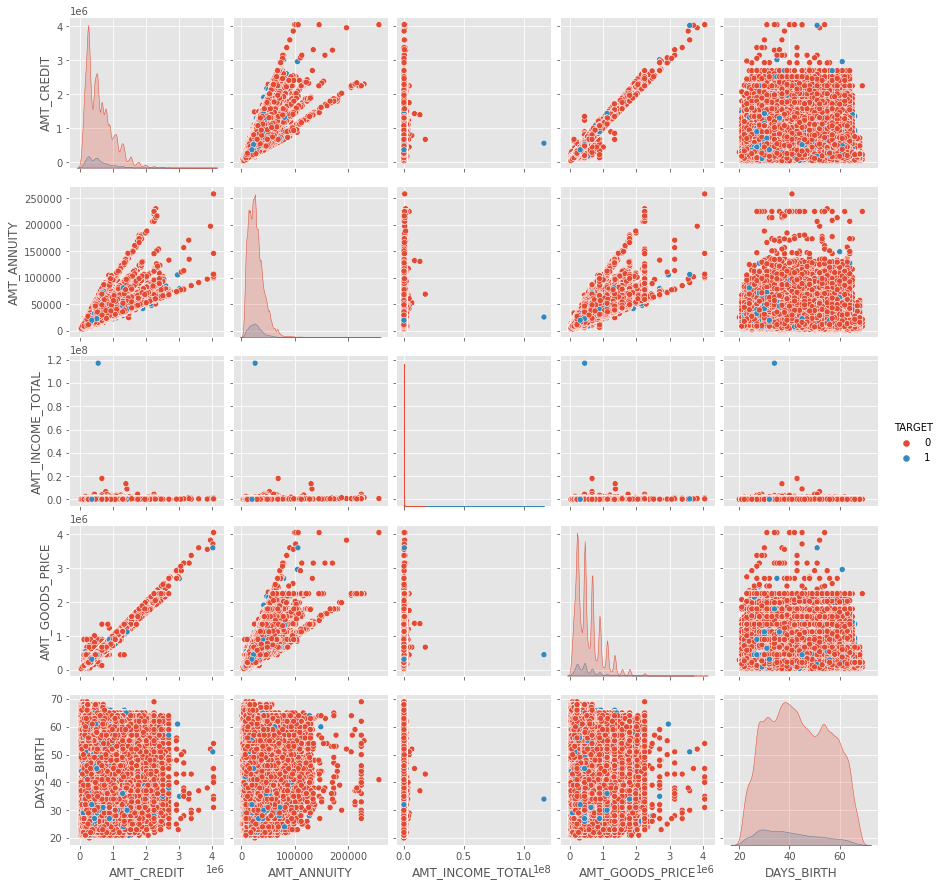

In [88]:
# Plotting pairplot
_=sns.pairplot(pairplor_data,hue='TARGET',diag_kind='kde')

Insights-

* AMT_CREDIT & AMT_GOODS_PRICE are correlated  ( With higher priced goods, loan amount is higher)
* AMT_ANNUITY & AMT_GOODS_PRICE are also correlated ( With higher annuity, expensive goods are purchased)
* AMT_ANNUITY & AMT_CREDIT are correlated (Higher the annuity,higher the loan amount)

With respect to TARGET - 
* Loan defaulters ( Blue ) are younger in age


##### Correlation Check using Heatmap

In [89]:
# Data prep for heatmap
heatmap_data = credit_data_2[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT',]].corr(method = 'pearson')

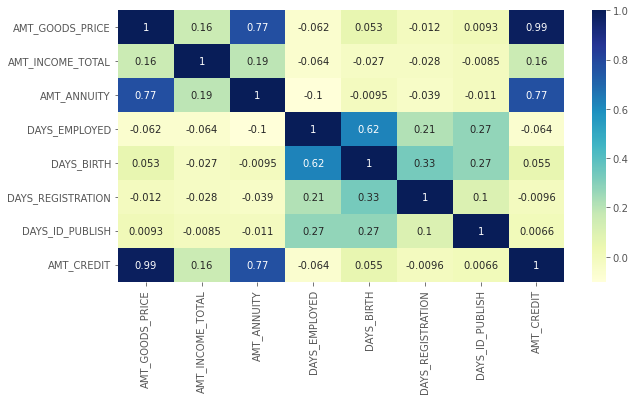

In [90]:
# Plotting heatmap
_=sns.heatmap(heatmap_data, annot = True,cmap ='YlGnBu')

Insights-
* The heatmap confirms our correlation findings from pariplot

##### Top 10 correlations in the data

In [91]:
# Preparing data for getting top 10 correlation combinations 

corr_matrix=defaulter[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')                     # Getting Correaltion Matrix

# Filtering top half traingle usng np.triu
corr_matrix=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

corr_matrix_df=corr_matrix.unstack().reset_index()            # Unstacking the last dataframe to get combos of 2 variables 
corr_matrix_df

,level_0,level_1,0
0,AMT_GOODS_PRICE,AMT_GOODS_PRICE,NaN
1,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,NaN
2,AMT_GOODS_PRICE,AMT_ANNUITY,NaN
3,AMT_GOODS_PRICE,DAYS_EMPLOYED,NaN
4,AMT_GOODS_PRICE,DAYS_BIRTH,NaN
5,AMT_GOODS_PRICE,DAYS_REGISTRATION,NaN
6,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,NaN
7,AMT_GOODS_PRICE,AMT_CREDIT,NaN
8,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.038
9,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,NaN


In [92]:
corr_matrix_df.columns = ['Variable 1','Variable 2','Correlation']          # Naming the cols apprpriately
corr_matrix_df.dropna(subset=['Correlation'],inplace=True)                  # Dropping NAs

# Adding absolute column as we are interested in magnitude
corr_matrix_df['Correlation ( Absolute )']=corr_matrix_df['Correlation'].abs() 

# Sorting by top correlations and getting top 10 combos
corr_matrix_df.sort_values('Correlation ( Absolute )', ascending=False).head(10)

,Variable 1,Variable 2,Correlation,Correlation ( Absolute )
56,AMT_CREDIT,AMT_GOODS_PRICE,0.983,0.983
16,AMT_ANNUITY,AMT_GOODS_PRICE,0.752,0.752
58,AMT_CREDIT,AMT_ANNUITY,0.752,0.752
35,DAYS_BIRTH,DAYS_EMPLOYED,0.582,0.582
44,DAYS_REGISTRATION,DAYS_BIRTH,0.289,0.289
52,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252,0.252
51,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229,0.229
43,DAYS_REGISTRATION,DAYS_EMPLOYED,0.192,0.192
32,DAYS_BIRTH,AMT_GOODS_PRICE,0.136,0.136
60,AMT_CREDIT,DAYS_BIRTH,0.135,0.135


# 4. Final Insights 

Following are the driving factors for a loan default - 

* Lower the highest education of an applicant, higher the chance of loan default. 
This is one of the core driving factor in loan defaults.

* Labourers & Sales staff are major area of concern , with maximum applicants and a significant loan default rate. Drivers also have an alarming combination of counts and default %.

* Applicants on Maternity leave have a whopping 40% loan default rate. Unemployed applicants also have 35% loan defaults

* Low Income range have maximum % of loan defaults. As the Income range increases, loan default probability decreases

* Among different family status, married ones have the highest likelihood of loan default

* Applicants with lower Annuity Amount are slightly more likely to default on a loan.

* Young applicants are more expected to default on a loan.

* More Men deafault loans as compared to Women
